In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [2]:
from tqdm.auto import tqdm

In [3]:
import numpy as np 

In [11]:
os.makedirs("./Plots", exist_ok=True)
ann_list = os.listdir("./breathe_annotations/")

for k in tqdm(ann_list):
    y, sr = librosa.load(k[:-4]+".wav",sr = None) 
    ann = pd.read_csv("./breathe_annotations/"+k, delimiter="\t", header=None)   
    start = ann.iloc[:,0]
    stop = ann.iloc[:,1]
    for i in range(0,len(start)):
        waveform = y[int(round(start[i]*sr)):int(round((stop[i])*sr))]
        plt.figure()
        librosa.display.waveplot(waveform)
        os.makedirs("./Plots/"+k[:-4],exist_ok=True)
        plt.savefig("./Plots/"+k[:-4]+'/' + str(i) + '.jpg')
        plt.close()

  0%|          | 0/18 [00:00<?, ?it/s]

In [28]:
A = {}
for k in tqdm(ann_list):
    ann = pd.read_csv("./breathe_annotations/"+k, delimiter="\t", header=None)   
    start = ann.iloc[:,0]
    stop = ann.iloc[:,1]
    A[k] = len(start)
    


  0%|          | 0/259 [00:00<?, ?it/s]

### Plot with Inhale and Exhale


In [4]:
ann_list = [i for i in os.listdir("./") if i.endswith(".txt")]

In [5]:
len(ann_list)

285

In [11]:
ann_list

['1306_C_Na_M_Na_Na_N.txt',
 '1176_C_Na_M_Na_Na_Y.txt',
 '2390_P_Asthma_F_after_Mod_Y.txt',
 '1452_C_Na_M_Na_Na_Y.txt',
 '1032_C_Na_M_Na_Na_Y.txt',
 '2269_P_Asthma_F_after_TBD_Y.txt',
 '2020_P_Asthma_F_after_Mod_Y.txt',
 '2365_P_Asthma_F_after_TBD_Y.txt',
 '1310_C_Na_M_Na_Na_N.txt',
 '2115_P_Asthma_F_before_Mod_Y.txt',
 '2485_P_Asthma_F_before_TBD_Y.txt',
 '1030_C_Na_F_Na_Na_Y.txt',
 '2316_P_Asthma_M_after_Sev_Y.txt',
 '2465_P_Asthma_M_before_Sev_Y.txt',
 '2223_P_Asthma_F_after_TBD_Y.txt',
 '1435_C_Na_M_Na_Na_Y.txt',
 '2103_P_Asthma_M_after_TBD_Y.txt',
 '2335_P_Asthma_F_after_TBD_Y.txt',
 '1217_C_Na_F_Na_Na_Y.txt',
 '2081_P_Asthma_F_after_Mil_Y.txt',
 '1425_C_Na_M_Na_Na_N.txt',
 '1069_C_Na_M_Na_Na_N.txt',
 '2109_P_Asthma_F_after_Mil_Y.txt',
 '2405_P_Asthma_M_after_Mod_Y.txt',
 '2074_P_Asthma_M_after_Mil_Y.txt',
 '1335_C_Na_M_Na_Na_Y.txt',
 '2366_P_Asthma_M_after_Sev_Y.txt',
 '1475_C_Na_F_Na_Na_N.txt',
 '1077_C_Na_F_Na_Na_Y.txt',
 '2494_P_Asthma_F_before_Sev_Y.txt',
 '2235_P_Asthma_F_af

In [12]:
ann_list.index('1381_C_Na_F_Na_Na_Y.txt')

269

In [13]:
waste = []
for i in tqdm(ann_list[269:]):
    A = pd.read_csv(i, sep="\t", header=None)
    B = pd.DataFrame()
    try:
        labels = A.iloc[:,2]
        for j in range(0,len(labels)):
            if labels[j].find("nhale") != -1:
                if labels[j+1].find("xhale") != -1:
                    B = B.append(A.iloc[j])
                    B = B.append(A.iloc[j+1])
                elif labels[j+1].find("heeze") != -1:
                    if labels[j+2].find("xhale") != -1:
                        B = B.append(A.iloc[j])
                        B = B.append(A.iloc[j+2])
        if B.shape[0] != 0:
            y, sr = librosa.load(i[:-4]+".wav",sr = None)
            for k in range(0, B.shape[0] , 2):
                start_inhale = B.iloc[k,0]
                stop_inhale = B.iloc[k,1]
                start_exhale = B.iloc[k+1,0]
                stop_exhale = B.iloc[k+1,1]
                waveform = y[int(round(start_inhale*sr)):int(round(stop_exhale*sr))]
                plt.figure()
                plt.plot(waveform)
                plt.axvspan(0,int(round((stop_inhale-start_inhale)*sr)), ymin=np.min(y), ymax=np.max(y), alpha = 0.2, label = "Inhale")
                plt.axvspan(int(round((start_exhale-start_inhale)*sr)),int(round((stop_exhale-start_inhale)*sr)), ymin=np.min(y), ymax=np.max(y), label = "Exhale", alpha = 0.2, facecolor = "g")
                plt.legend()
                os.makedirs("./Plots/"+i[:-4],exist_ok=True)
                plt.savefig("./Plots/"+i[:-4]+'/' + str(k) + '.jpg')
                plt.close()

        else:
            waste.append(i)
    except:
        waste.append(i)

    
                
            

  0%|          | 0/16 [00:00<?, ?it/s]

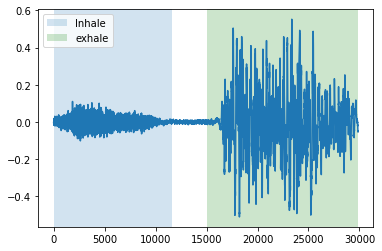

In [67]:
waveform = y[int(round(29.411343*sr)):int(round(31.277832*sr))]
plt.figure()
plt.plot(waveform)
pylab.axvspan(int(round(0*sr)),int(round((30.136889-29.411343)*sr)), ymin=-0.5107727, ymax=np.max(y), alpha = 0.2, label = 'Inhale')
plt.axvspan(int(round((30.349720-29.411343)*sr)),int(round((31.277832- 29.411343)*sr)), ymin=np.min(y), ymax=np.max(y), alpha = 0.2, facecolor = 'g', label = 'exhale')
plt.legend()
